In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel( "Deep-surface - Copy (2).xlsx")

In [4]:
df.dropna(subset=['Timestamp', 'Surface_temperature_S323', 'Air_temperature_S323',
       'Humidity_S323', 'Dew_point_S323', 'Wind_max_S323', 'Mean_wind_30min_S323',
       'Friction_S323', 'Water_layer_S323', 'Surface_temperature_S316',
       'Air_temperature_S316', 'Humidity__S316', 'Dew_point__S316',
       'Wind_max_S316', 'Mean_wind_30min_S316', 'Friction_S316',
       'Water_layer_S316', 'Surface_temperature_S321'],inplace=True)

In [5]:
df = df.drop('Timestamp',axis=1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Surface_temperature_S321',axis=1).values
y = df['Surface_temperature_S321'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train = scaler.fit_transform(X_train)

In [12]:
X_test = scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
from tensorflow.keras.layers import Dense

In [15]:
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(18,activation='tanh'))
model.add(Dense(18,activation='tanh'))
model.add(Dense(18,activation='tanh'))
model.add(Dense(18,activation='tanh'))


model.add(Dense(1))

model.compile(optimizer='SGD',loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=12,epochs=200)

Train on 4639 samples, validate on 1989 samples
Epoch 1/200
4639/4639 [==============================] - 2s 464us/sample - loss: 7.9262 - val_loss: 1.8538
Epoch 2/200
4639/4639 [==============================] - 2s 391us/sample - loss: 2.2521 - val_loss: 1.9703
Epoch 3/200
4639/4639 [==============================] - 2s 485us/sample - loss: 1.8187 - val_loss: 1.7604
Epoch 4/200
4639/4639 [==============================] - 2s 342us/sample - loss: 1.4062 - val_loss: 1.8190
Epoch 5/200
4639/4639 [==============================] - 1s 305us/sample - loss: 1.2506 - val_loss: 0.8679
Epoch 6/200
4639/4639 [==============================] - 1s 240us/sample - loss: 1.2525 - val_loss: 1.1296
Epoch 7/200
4639/4639 [==============================] - 1s 214us/sample - loss: 1.0530 - val_loss: 0.6947
Epoch 8/200
4639/4639 [==============================] - 1s 270us/sample - loss: 1.1146 - val_loss: 1.7606
Epoch 9/200
4639/4639 [==============================] - 2s 395us/sample - loss: 0.9928 - val_lo

4639/4639 [==============================] - 1s 162us/sample - loss: 0.5997 - val_loss: 0.5126
Epoch 77/200
4639/4639 [==============================] - 1s 173us/sample - loss: 0.5925 - val_loss: 0.4846
Epoch 78/200
4639/4639 [==============================] - 1s 197us/sample - loss: 0.5807 - val_loss: 0.7811
Epoch 79/200
4639/4639 [==============================] - 1s 194us/sample - loss: 0.5968 - val_loss: 0.4900
Epoch 80/200
4639/4639 [==============================] - 1s 139us/sample - loss: 0.5806 - val_loss: 0.6554
Epoch 81/200
4639/4639 [==============================] - 1s 135us/sample - loss: 0.5842 - val_loss: 0.7594
Epoch 82/200
4639/4639 [==============================] - 1s 197us/sample - loss: 0.5858 - val_loss: 0.4847
Epoch 83/200
4639/4639 [==============================] - 1s 148us/sample - loss: 0.5803 - val_loss: 0.5158
Epoch 84/200
4639/4639 [==============================] - 1s 127us/sample - loss: 0.5930 - val_loss: 0.6138
Epoch 85/200
4639/4639 [=================

4639/4639 [==============================] - 1s 175us/sample - loss: 0.4887 - val_loss: 0.6742
Epoch 152/200
4639/4639 [==============================] - 1s 134us/sample - loss: 0.4941 - val_loss: 0.5158
Epoch 153/200
4639/4639 [==============================] - 1s 130us/sample - loss: 0.4741 - val_loss: 0.4451
Epoch 154/200
4639/4639 [==============================] - 1s 133us/sample - loss: 0.4823 - val_loss: 0.4651
Epoch 155/200
4639/4639 [==============================] - 1s 135us/sample - loss: 0.5043 - val_loss: 0.4723
Epoch 156/200
4639/4639 [==============================] - 1s 136us/sample - loss: 0.4834 - val_loss: 0.5243
Epoch 157/200
4639/4639 [==============================] - 1s 131us/sample - loss: 0.4876 - val_loss: 0.5203
Epoch 158/200
4639/4639 [==============================] - 1s 131us/sample - loss: 0.4889 - val_loss: 0.4367
Epoch 159/200
4639/4639 [==============================] - 1s 156us/sample - loss: 0.4852 - val_loss: 0.4268
Epoch 160/200
4639/4639 [========

In [18]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

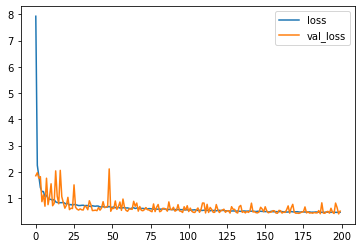

In [19]:
losses.plot()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [21]:
predictions = model.predict(X_test)

In [22]:
mean_squared_error(y_test,predictions)

0.507953902857094

In [23]:
np.sqrt(mean_squared_error(y_test,predictions))

0.7127088485890252

In [24]:
mean_absolute_error(y_test,predictions)

0.5400632790490694

In [25]:
explained_variance_score(y_test,predictions)

0.9848865666867515

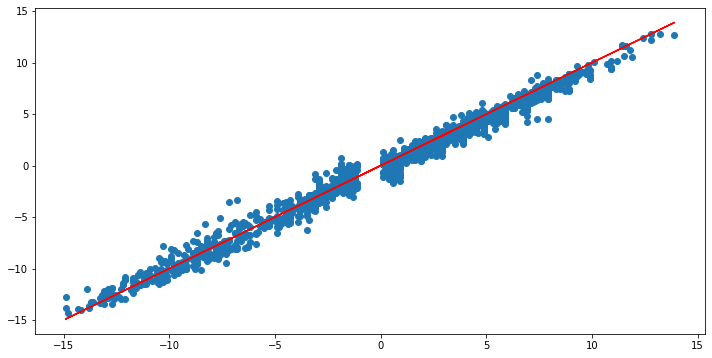

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')